In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
import seaborn as sns

url = ("https://archive.ics.uci.edu/ml/machine-learning-databases""/spambase/spambase.data")
spambase = pd.read_csv(url, header=None)

In [2]:
spambase.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [3]:
spambase.columns = [
"word_freq_make",         
"word_freq_address",      
"word_freq_all",          
"word_freq_3d",           
"word_freq_our",          
"word_freq_over",         
"word_freq_remove",       
"word_freq_internet",     
"word_freq_order",        
"word_freq_mail",         
"word_freq_receive",      
"word_freq_will",         
"word_freq_people",       
"word_freq_report",       
"word_freq_addresses",    
"word_freq_free",         
"word_freq_business",     
"word_freq_email",        
"word_freq_you",          
"word_freq_credit",       
"word_freq_your",         
"word_freq_font",         
"word_freq_000",          
"word_freq_money",        
"word_freq_hp",           
"word_freq_hpl",          
"word_freq_george",       
"word_freq_650",          
"word_freq_lab",          
"word_freq_labs",         
"word_freq_telnet",       
"word_freq_857",          
"word_freq_data",         
"word_freq_415",          
"word_freq_85",           
"word_freq_technology",   
"word_freq_1999",         
"word_freq_parts",        
"word_freq_pm",           
"word_freq_direct",       
"word_freq_cs",           
"word_freq_meeting",      
"word_freq_original",     
"word_freq_project",      
"word_freq_re",           
"word_freq_edu",          
"word_freq_table",        
"word_freq_conference",   
"char_freq_;",            
"char_freq_(",            
"char_freq_[",            
"char_freq_!",            
"char_freq_$",            
"char_freq_#",            
"capital_run_length_average", 
"capital_run_length_longest", 
"capital_run_length_total" ,  
"Class",
]

In [4]:
spambase = spambase.drop("word_freq_make", axis=1)

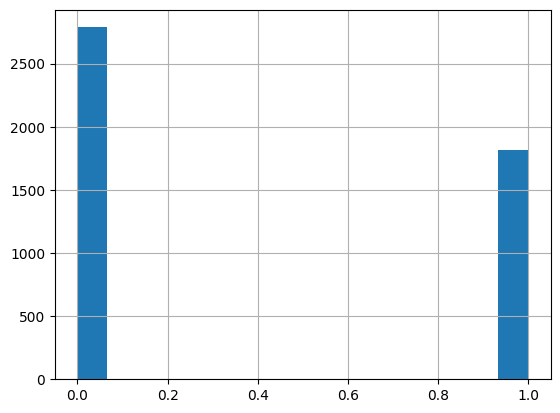

In [5]:

spambase["Class"].hist(bins=15)
plt.show()

In [6]:
correlation_matrix = spambase.corr()
correlation_matrix["Class"]

word_freq_address            -0.030224
word_freq_all                 0.196988
word_freq_3d                  0.057371
word_freq_our                 0.241920
word_freq_over                0.232604
word_freq_remove              0.332117
word_freq_internet            0.206808
word_freq_order               0.231551
word_freq_mail                0.138962
word_freq_receive             0.234529
word_freq_will                0.007741
word_freq_people              0.132927
word_freq_report              0.060027
word_freq_addresses           0.195902
word_freq_free                0.263215
word_freq_business            0.263204
word_freq_email               0.204208
word_freq_you                 0.273651
word_freq_credit              0.189761
word_freq_your                0.383234
word_freq_font                0.091860
word_freq_000                 0.334787
word_freq_money               0.216111
word_freq_hp                 -0.256723
word_freq_hpl                -0.232968
word_freq_george         

In [7]:
a = np.array([2, 2])
b = np.array([4, 4])
np.linalg.norm(a - b)

2.8284271247461903

In [8]:
X = spambase.drop("Class", axis=1)
X = X.values
y = spambase["Class"]
y = y.values

In [9]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=12345
)

In [10]:
knn_model = KNeighborsRegressor(n_neighbors=3)

In [11]:
knn_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [12]:
train_preds = knn_model.predict(X_train)
mse = mean_squared_error(y_train, train_preds)
rmse = sqrt(mse)
rmse

0.26185652670825327

In [13]:
test_preds = knn_model.predict(X_test)
mse = mean_squared_error(y_test, test_preds)
rmse = sqrt(mse)
rmse

0.3866202375809238

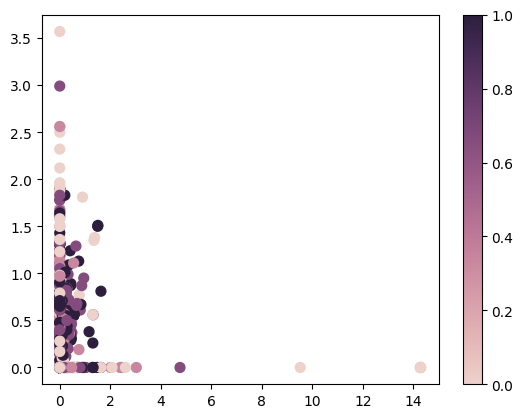

In [14]:
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(    X_test[:, 0], X_test[:, 1], c=test_preds, s=50, cmap=cmap)
f.colorbar(points)
plt.show()



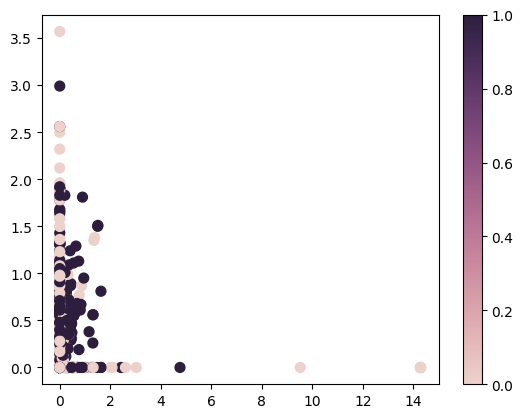

In [15]:
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=50, cmap=cmap)
f.colorbar(points)
plt.show()